In [1]:
"""
Landon Buell
PHYS 799
Make Spectrogram figures
30 Nov 2020
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.fftpack as fftpack
import scipy.io.wavfile as sciowav
import scipy.signal as signal

In [14]:
def GetWavFiles():
    """ Get all Wav files in CWD"""
    path = os.getcwd()
    wavFiles = []
    files = os.listdir(path)
    for file in files:
        if file.endswith(".wav"):
            wavFiles.append(file)
    return wavFiles

wavFiles = GetWavFiles()
print(wavFiles)

['AltoSax-A4.wav', 'Bassoon-D4.wav', 'CELLO-F4.wav', 'Clarinet-Gs5.wav', 'FLUTE-Cs6.wav', 'FRENCHHORN-Cs4.wav', 'GUITAR-B2.wav', 'Marimba-C2.wav', 'Oboe.Bb4.R.wav', 'SawtoothWave-880Hz.wav', 'SineWave-880Hz.wav', 'SquareWave-880Hz.wav', 'TenorTrombone-F4.wav', 'TriangleWave-880Hz.wav', 'Trumpet-B3.wav', 'Tuba-A2.wav', 'Vibraphone-A5.wav', 'Viola-G4.wav', 'Violin-G4.wav', 'WhiteNoise-190.wav']


In [15]:
def CenterOfMass(x):
    """ Compute Center of Mass of x """
    x = np.abs(x)
    _weights = np.arange(len(x))
    _sum = np.sum(x)
    return np.dot(_weights,x)/_sum


In [16]:
def TimeDomainEnvelope(X,nSplits=5):
        """ 
        Compute Time-Envelope by waveform or by frame (Virtanen) 
        --------------------------------
        nSplits (int) : Number of sections to split waveform into.
        --------------------------------
        Return Time-Domain-Envelope of waveform or frames
        """
        # Change this in main classifier!
        TDEs = np.empty(shape=nSplits)
        startIdxs = np.empty(shape=nSplits)
        samplesPerSplit = int(len(X)/nSplits)   
        for i in range(0,nSplits):
            startIdx = i*samplesPerSplit            # where frame starts
            frame = X[startIdx:startIdx+samplesPerSplit]   # make temporary frame
            RMS = np.sqrt(np.sum(frame**2)/samplesPerSplit)  
            TDEs[i] = RMS     
            startIdxs[i] = startIdx     
        del(X)
        return TDEs,startIdxs
    

In [36]:
def ZeroCrossings(x):
    """ Find Zero crossings """
    ZXRs = np.array([])
    for i in range(1,len(x)-1):
        if np.sign(x[i]) != np.sign(x[i-1]):
            ZXRs = np.append(ZXRs,i)
    return ZXRs
        

In [17]:
def PlotTDE(X,Y,Z,COM,vertLines,namesave):
    """ Plot Time Domian Envelopes """
    plt.figure(figsize=(16,6))
    plt.xlabel("Time [Samples]",size=40,weight='bold')
    plt.ylabel("Amplitude",size=40,weight='bold')
    
    plt.plot(np.arange(len(X)),X,color='blue',label="Waveform")
    plt.plot(Y,Z,color='red',marker="o",markersize=20,label='RMS Energy')
    
    plt.xlim(0,len(X))
    
    plt.hlines(0,0,len(X),color='black')
    plt.vlines(vertLines,-1,1,color='black')
    
    plt.grid()
    plt.legend(fontsize=20)
    plt.tight_layout()
    
    namesave = namesave.replace(".wav","")
    plt.savefig(namesave+"_TDE.png")
    plt.show()

In [46]:
def PlotTimeFeatures(waveform,namesave):
    """ Plot Time Domian Envelopes """
    
    # Format fig
    plt.figure(figsize=(16,6))
    plt.xlabel("Time [Samples]",size=40,weight='bold')
    plt.ylabel("Amplitude",size=40,weight='bold')
    
    # Make Features 
    TDEs,sts = TimeDomainEnvelope(waveform)
    TDEs = TDEs / np.max(TDEs)
    dotPositions = [x + 0.5*(_len/5) for x in sts]
    COM = CenterOfMass(waveform)
    ZXR = ZeroCrossings(waveform)
    
    # Plot Figures
    plt.plot(np.arange(len(waveform)),waveform,color='blue',label="Waveform")
    plt.plot(dotPositions,TDEs,color='red',marker="o",markersize=20,label='RMS Energy')
    plt.plot(COM,0.0,color='orange',marker='s',markersize=20,label='Center of Mass')
    #plt.plot(ZXR,np.zeros(len(ZXR)),color='green',marker='h',markersize=2,label="Zero Crossings")
    
    plt.xlim(0,len(waveform))
    
    plt.hlines(0,0,len(waveform),color='black')
    plt.vlines(sts,-1,1,color='black')
    
    plt.grid()
    plt.legend(fontsize=20)
    plt.tight_layout()
    
    namesave = namesave.replace(".wav","")
    plt.savefig(namesave+".png")
    plt.show()

GUITAR-B2.wav


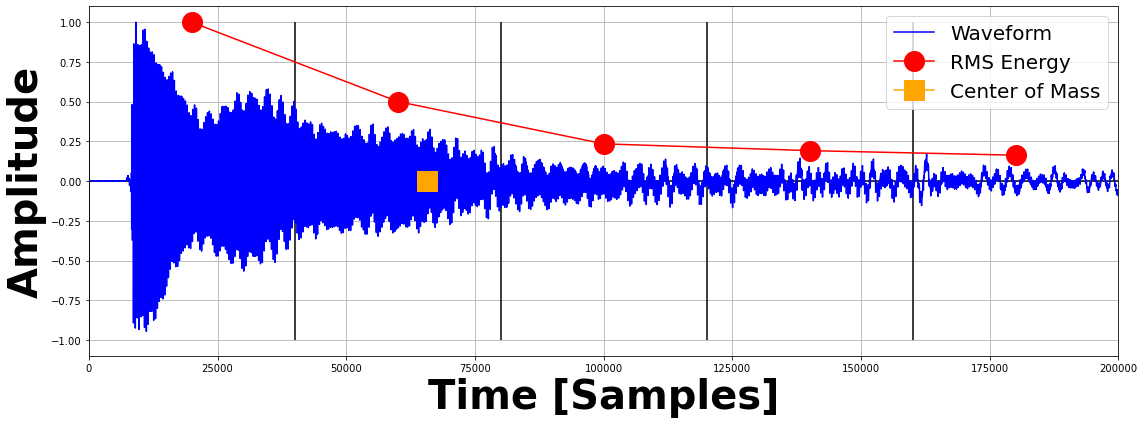

In [47]:
file = wavFiles[6]
print(file)
rate,waveform = sciowav.read(file) 
waveform = (waveform / np.max(np.abs(waveform))).ravel()

_len = 200000
if len(waveform) < _len:
    deficit = _len - len(waveform)
    waveform = np.append(waveform,np.zeros(deficit))
else:
    waveform = waveform[:_len]
    
PlotTimeFeatures(waveform,"JMMExample1")

Marimba-C2.wav


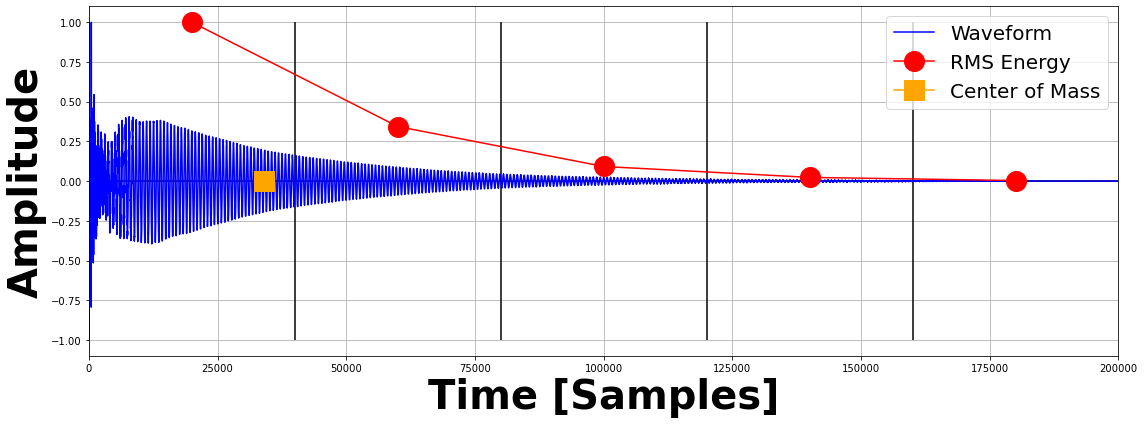

In [48]:
file = wavFiles[7]
print(file)
rate,waveform = sciowav.read(file) 
waveform = (waveform / np.max(np.abs(waveform))).ravel()

_len = 200000
if len(waveform) < _len:
    deficit = _len - len(waveform)
    waveform = np.append(waveform,np.zeros(deficit))
else:
    waveform = waveform[:_len]
    
PlotTimeFeatures(waveform,"JMMExample2")